In [1]:
import pandas as pd 

QA Performance Analysis

In [165]:
df = pd.read_csv ("../qa_evaluation_results_distilBERT.csv")

In [166]:
qa_task_df = df.groupby(['neuron_mapping', 'interchange_method', 'include_causal_cos', 'metrics'])["performance"].mean().reset_index()

In [167]:
qa_task_df.pivot_table('performance', ['neuron_mapping', 'interchange_method', 'include_causal_cos'], 'metrics')

,,metrics,em,f1
neuron_mapping,interchange_method,include_causal_cos,,
multiple_single_middle_late,consec,False,71.470553,81.008120
multiple_single_multilayer,consec,False,71.957742,81.325773
no_mapping,no_interchange,False,70.233365,79.994151
single_middle,consec,False,71.927080,81.317613


NER Performance Analysis

In [147]:
df = pd.read_csv ("../ner_evaluation_results_distilBERT.csv")

In [148]:
ner_task_df = df.groupby(['neuron_mapping', 'interchange_method', 'include_causal_cos', 'metrics'])["performance"].mean().reset_index()

In [152]:
ner_task_df.pivot_table('performance', ['neuron_mapping', 'interchange_method', 'include_causal_cos'], 'metrics')*100

metrics                                                             accuracy  \
neuron_mapping              interchange_method include_causal_cos              
multiple_single_middle_late consec             False               98.514855   
multiple_single_multilayer  consec             False               98.534195   
                                               True                98.539128   
                            masked             False               98.552367   
                            random             False               98.542502   
no_mapping                  no_interchange     False               98.482925   
single_middle               consec             False               98.556520   

metrics                                                                   f1  
neuron_mapping              interchange_method include_causal_cos             
multiple_single_middle_late consec             False               92.357362  
multiple_single_multilayer  consec             False               92.354767  
                                               True                92.351088  
                            masked             False               92.450514  
                            random             False               92.408159  
no_mapping                  no_interchange     False               92.120532  
single_middle               consec             False               92.467045

GLUE Performance Analysis

In [157]:
df = pd.read_csv ("../glue_evaluation_results_distilBERT.csv")

In [160]:
glue_task_df = df.groupby(['neuron_mapping', 'glue_task'])["performance"].median().reset_index()

In [161]:
glue_task_df.pivot_table('performance', ['neuron_mapping'], 'glue_task')*100

glue_task,cola,mnli,mnli-mm,mrpc,qnli,qqp,rte,sst2,stsb,wnli
neuron_mapping,,,,,,,,,,
multiple_single_middle_late,44.399364,79.531330,80.532954,85.000000,85.630606,87.052715,60.288809,90.137615,81.909390,16.901408
multiple_single_multilayer,43.238427,79.709628,80.563466,85.483733,85.612301,87.119952,59.927798,90.022936,81.276056,16.901408
no_mapping,39.953168,78.879266,79.953214,85.129156,84.605528,86.744990,60.288809,89.506881,80.231997,16.901408
single_middle,43.400294,79.449822,80.349878,84.539313,85.392641,87.042018,60.649819,90.022936,81.446711,16.901408


In [162]:
df = pd.read_csv ("../glue_evaluation_results.csv")

In [163]:
glue_task_df = df.groupby(['interchange_method', 'include_causal_cos', 'glue_task'])["performance"].median().reset_index()

In [164]:
glue_task_df.pivot_table('performance', ['interchange_method', 'include_causal_cos'], 'glue_task')*100

,glue_task,cola,mnli,mnli-mm,mrpc,qnli,qqp,rte,sst2,stsb,wnli
interchange_method,include_causal_cos,,,,,,,,,,
consec,True,45.528986,79.694345,80.593979,85.382839,85.804503,87.094452,60.649819,90.309633,81.865925,15.492958
masked,False,43.337725,79.653591,80.502441,85.411765,85.593996,87.100417,61.191336,90.022936,81.615872,15.492958
random,False,44.417674,79.663780,80.655004,85.526900,85.703826,87.136052,61.010830,89.793578,81.028990,15.492958


MLM Performance Analysis

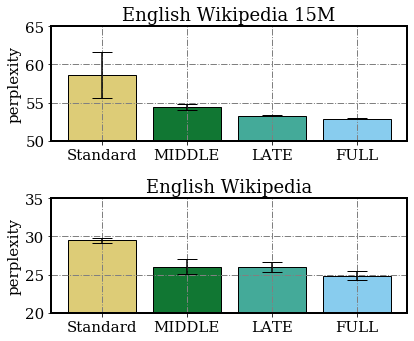

In [173]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("ggplot")
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 15}
plt.rc('font', **font)
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig, axs = plt.subplots(2, 1, figsize=(6, 5))
    langs = ['Standard', 'MIDDLE', 'LATE', 'FULL']
    students = [58.63375, 54.4309, 53.2990, 52.88815]
    errors = [2.988840883, 0.3688976077, 0.02969848481, 0.05649783182]
    axs[0].bar(
        langs,students,color=['#ddcc77', "#117733", "#44aa99", "#88ccee"], edgecolor='black',
        yerr=errors, align='center', ecolor='black', capsize=10
    )
    axs[0].set_ylim(50,65)
    langs = ['Standard', 'MIDDLE', 'LATE', 'FULL']
    students = [29.5069, 26.0449, 25.9698, 24.84965]
    errors = [0.3184808942, 0.93, 0.626204175, 0.578201215]
    axs[1].bar(
        langs,students,color=['#ddcc77', "#117733", "#44aa99", "#88ccee"], edgecolor='black',
        yerr=errors, align='center', ecolor='black', capsize=10
    )
    axs[1].set_ylim(20,35)
    axs[0].set_ylabel("perplexity")
    axs[1].set_ylabel("perplexity")
    axs[0].set_title("English Wikipedia 15M")
    axs[1].set_title("English Wikipedia")
    fig.tight_layout()
    axs[0].spines["top"].set_linewidth(2)
    axs[0].spines["bottom"].set_linewidth(2)
    axs[0].spines["left"].set_linewidth(2)
    axs[0].spines["right"].set_linewidth(2)
    axs[1].spines["top"].set_linewidth(2)
    axs[1].spines["bottom"].set_linewidth(2)
    axs[1].spines["left"].set_linewidth(2)
    axs[1].spines["right"].set_linewidth(2)
    axs[0].xaxis.grid(color='grey', linestyle='-.', linewidth=1)
    axs[0].yaxis.grid(color='grey', linestyle='-.', linewidth=1)
    axs[1].xaxis.grid(color='grey', linestyle='-.', linewidth=1)
    axs[1].yaxis.grid(color='grey', linestyle='-.', linewidth=1)
    plt.savefig("../paper_figures/ppl_last.png", dpi=1000, bbox_inches='tight')

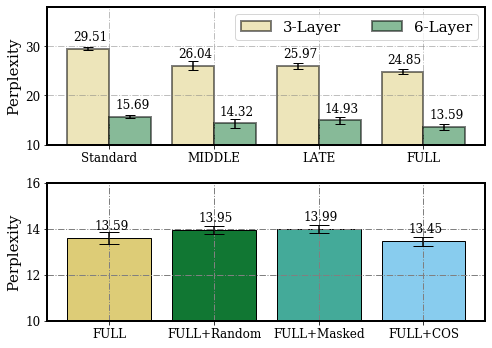

In [136]:
# plt.style.use("ggplot")

plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 12}
plt.rc('font', **font)

with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):

    fig, axs = plt.subplots(2, 1, figsize=(7, 5))

    groups = [
        [29.5069, 26.0449, 25.9698, 24.84965],
        [15.69, 14.32, 14.93, 13.59]
    ]
  
    std_groups = [
        [0.3184808942, 0.93, 0.626204175, 0.578201215], 
        [1.51, 0.12, 0.23, 0.25],
    ]
    
    group_names = ['3-Layer', '6-Layer',]
    groupby_names = ['Standard', 'MIDDLE', 'LATE', 'FULL']

    x = np.array([0, 1, 2, 3,])  # the label
    width = 0.4  # the width of the bars
    rects0 = axs[0].bar(x - width/2, groups[0], yerr=std_groups[0], width=width,label=group_names[0], 
                    edgecolor='black', color="#ddcc77", alpha=0.5, linewidth=2,
                    ecolor='black', capsize=5, align='center'
                   )
    rects1 = axs[0].bar(x + width/2, groups[1], yerr=std_groups[0], width=width, label=group_names[1], 
                    edgecolor='black', color="#117733", alpha=0.5, linewidth=2,
                    ecolor='black', capsize=5, align='center'
                   )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[0].set_ylabel('Perplexity', fontsize=15)
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(groupby_names, fontsize=12)
    axs[0].legend(
        loc='upper right', fontsize=15, ncol=2
    )
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            axs[0].annotate('{:.2f}'.format(height),
                        xy=(0.02+ rect.get_x() + rect.get_width() / 2, height+0.02),
                        xytext=(0, 5),  # 3 points vertical offset
                        textcoords="offset points", color="black",
                        ha='center', va='bottom', fontsize=12,)

    autolabel(rects0)
    autolabel(rects1)
    
    fig.tight_layout()

    axs[0].spines["top"].set_linewidth(2)
    axs[0].spines["bottom"].set_linewidth(2)
    axs[0].spines["left"].set_linewidth(2)
    axs[0].spines["right"].set_linewidth(2)
    axs[0].spines["top"].set_linewidth(2)
    axs[0].spines["bottom"].set_linewidth(2)
    axs[0].spines["left"].set_linewidth(2)
    axs[0].spines["right"].set_linewidth(2)
    axs[0].xaxis.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.5)
    axs[0].yaxis.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.5)
    
    axs[0].set_facecolor("white")
    # plt.title(f"GLUE Scores with Scrambled Identities", fontsize=20)
    axs[0].set_ylim(10,38)
    
    langs = ['FULL', 'FULL+Random', 'FULL+Masked', 'FULL+COS']
    
    students = [13.59, 13.95, 13.99, 13.45]
    errors = [0.25, 0.18, 0.16, 0.19]
    rects0 = axs[1].bar(
        langs,students,color=['#ddcc77', "#117733", "#44aa99", "#88ccee"], edgecolor='black',
        yerr=errors, align='center', ecolor='black', capsize=10
    )
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            axs[1].annotate('{:.2f}'.format(height),
                        xy=(0.02+ rect.get_x() + rect.get_width() / 2, height+0.02),
                        xytext=(0, 5),  # 3 points vertical offset
                        textcoords="offset points", color="black",
                        ha='center', va='bottom', fontsize=12,)

    autolabel(rects0)
    
    axs[1].set_ylim(10, 16)
    axs[1].set_ylabel('Perplexity', fontsize=15)
    fig.tight_layout()
    axs[1].spines["top"].set_linewidth(2)
    axs[1].spines["bottom"].set_linewidth(2)
    axs[1].spines["left"].set_linewidth(2)
    axs[1].spines["right"].set_linewidth(2)
    axs[1].xaxis.grid(color='grey', linestyle='-.', linewidth=1)
    axs[1].yaxis.grid(color='grey', linestyle='-.', linewidth=1)
    axs[1].set_xticklabels(langs, fontsize=12)
    
    # plt.show()
    plt.savefig("../paper_figures/ppl_last.png", dpi=1000, bbox_inches='tight')

/afs/cs.stanford.edu/u/wuzhengx/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


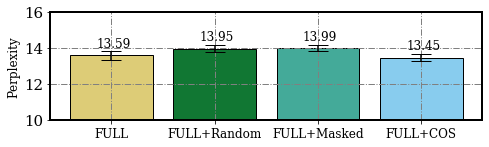

In [138]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("ggplot")
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 15}
plt.rc('font', **font)
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize=(6, 1.5))
    axs = fig.add_axes([0,0,1,1])
    
    
    
    langs = ['FULL', 'FULL+Random', 'FULL+Masked', 'FULL+COS']
    
    students = [13.59, 13.95, 13.99, 13.45]
    errors = [0.25, 0.18, 0.16, 0.19]
    rects0 = axs.bar(
        langs,students,color=['#ddcc77', "#117733", "#44aa99", "#88ccee"], edgecolor='black',
        yerr=errors, align='center', ecolor='black', capsize=10
    )
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            axs.annotate('{:.2f}'.format(height),
                        xy=(0.02+ rect.get_x() + rect.get_width() / 2, height+0.02),
                        xytext=(0, 5),  # 3 points vertical offset
                        textcoords="offset points", color="black",
                        ha='center', va='bottom', fontsize=12,)

    autolabel(rects0)
    
    axs.set_ylim(10, 16)
    axs.set_ylabel('Perplexity', fontsize=12)
    fig.tight_layout()
    axs.spines["top"].set_linewidth(2)
    axs.spines["bottom"].set_linewidth(2)
    axs.spines["left"].set_linewidth(2)
    axs.spines["right"].set_linewidth(2)
    axs.xaxis.grid(color='grey', linestyle='-.', linewidth=1)
    axs.yaxis.grid(color='grey', linestyle='-.', linewidth=1)
    # plt.savefig("../paper_figures/ppl_last.png", dpi=1000, bbox_inches='tight')
    axs.set_xticklabels(langs, fontsize=12)
    plt.show()
    
    

/afs/cs.stanford.edu/u/wuzhengx/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


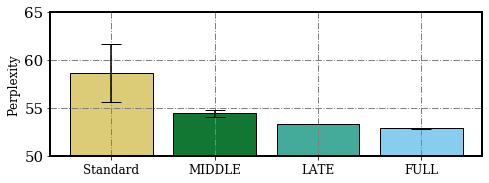

In [143]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("ggplot")
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 15}
plt.rc('font', **font)
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize=(6, 2))
    axs = fig.add_axes([0,0,1,1])
    
    
    
    langs = ['Standard', 'MIDDLE', 'LATE', 'FULL']
    
    students = [58.63375, 54.4309, 53.2990, 52.88815]
    errors = [2.988840883, 0.3688976077, 0.02969848481, 0.05649783182]
    rects0 = axs.bar(
        langs,students,color=['#ddcc77', "#117733", "#44aa99", "#88ccee"], edgecolor='black',
        yerr=errors, align='center', ecolor='black', capsize=10
    )
#     def autolabel(rects):
#         """Attach a text label above each bar in *rects*, displaying its height."""
#         for rect in rects:
#             height = rect.get_height()
#             axs.annotate('{:.2f}'.format(height),
#                         xy=(0.02+ rect.get_x() + rect.get_width() / 2, height+0.02),
#                         xytext=(0, 5),  # 3 points vertical offset
#                         textcoords="offset points", color="black",
#                         ha='center', va='bottom', fontsize=12,)

#     autolabel(rects0)
    
    axs.set_ylim(50,65)
    axs.set_ylabel('Perplexity', fontsize=12)
    fig.tight_layout()
    axs.spines["top"].set_linewidth(2)
    axs.spines["bottom"].set_linewidth(2)
    axs.spines["left"].set_linewidth(2)
    axs.spines["right"].set_linewidth(2)
    axs.xaxis.grid(color='grey', linestyle='-.', linewidth=1)
    axs.yaxis.grid(color='grey', linestyle='-.', linewidth=1)
    # plt.savefig("../paper_figures/ppl_last.png", dpi=1000, bbox_inches='tight')
    axs.set_xticklabels(langs, fontsize=12)
    # plt.show()
    
    plt.savefig("../paper_figures/ppl_last_low_resource.png", dpi=1000, bbox_inches='tight')
    
    